In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
# Tensor의 객체

# type: string, float etc
# shpape: demention of data
# Rank: number of demention

In [4]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [5]:
b = tf.constant([2,3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [6]:
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [7]:
d = tf.constant(['hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'hello'], shape=(1,), dtype=string)


In [8]:
rand  = tf.random.uniform([1], 0,1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.08760965], shape=(1,), dtype=float32)


In [9]:
rand2 = tf.random.normal([1,2],0,1)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[ 2.1425886  -0.29909784]], shape=(1, 2), dtype=float32)


In [10]:
rand3 = tf.random.normal(shape=(3,2), mean = 0, stddev= 1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 0.31515774 -0.12829539]
 [ 1.2297431   0.5015711 ]
 [-0.32356635  0.28860497]], shape=(3, 2), dtype=float32)


In [11]:
# Eager Mode
a = tf.constant(3)
b = tf.constant(2)

In [12]:
print(tf.add(a,b))
print(a+b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [13]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [14]:
print(tf.multiply(a,b))
print(a*b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [15]:
c = tf.add(a,b).numpy()
print(type(c))

<class 'numpy.int32'>


In [16]:
c_sqaure = np.square(c,dtype = np.float32)
c_tensor = tf.convert_to_tensor(c_sqaure)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [17]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.,]])

print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [18]:
print(t[:,1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [19]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [20]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [21]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [22]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [23]:
# type 변환 `type이 다르면 계산 안됨`

In [24]:
a = tf.constant(2)
print(a)

b =  tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [25]:
try:
    a + b
except:
    print('Error')

print(a + tf.cast(b,tf.int32))

Error
tf.Tensor(4, shape=(), dtype=int32)


In [26]:
# Auto Graph

In [27]:
import timeit

In [28]:
@tf.function
def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [29]:
def my_function_(x):
    return x**2 - 10*x +3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [30]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [31]:
tf_my_func.python_function(2)

-13

In [32]:
def function_to_get_faster(x,y,b):
    x = tf.matmul(x,y)
    x = x+b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.,2.]])
y1 = tf.constant([[2.],[3.]])
b1 = tf.constant(4.)

a_function_that_uses_a_graph(x1,y1,b1).numpy()

array([[12.]], dtype=float32)

In [33]:
def inner_function(x,y,b):
    x = tf.matmul(x,y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.],[3.]])
    b = tf.constant(4.)
    return inner_function(x,y,b)

outer_function(tf.constant([[1.,2.]])).numpy()

array([[12.]], dtype=float32)

In [34]:
print(tf.autograph.to_code(my_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [35]:
X = tf.Variable(20.)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


In [36]:
# AutoGrad

In [37]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [38]:
dy_dx = tape.gradient(y,x) # 한번만 가능
dy_dx.numpy()

6.0

In [39]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x,'y':y})

print('dz/dx:', grad['x'])
print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [40]:
# 신경망

In [41]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

def Neuron(x,W,bias=0):
    z = x + W +bias
    return sigmoid(z)

In [42]:
x = tf.random.normal((1,2),0,1)
W = tf.random.normal((1,2),0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[-0.71963066 -1.5325439 ]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.9744345  1.71544  ]], shape=(1, 2), dtype=float32)
[[0.155242   0.54559696]]


In [43]:
x = tf.random.normal((2,1),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[0.20588405]
 [0.03513855]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.15157706]
 [0.6626978 ]], shape=(2, 1), dtype=float32)
[[0.5884257]
 [0.6677079]]


In [44]:
x = tf.random.normal((1,),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape: (1,)
W.shape: (2, 1)
tf.Tensor([-0.23760927], shape=(1,), dtype=float32)
tf.Tensor(
[[-0.12860374]
 [ 0.7305691 ]], shape=(2, 1), dtype=float32)
[[0.4094564]
 [0.6208035]]


In [45]:
# 퍼셉트론
# w(next step) = (가중치) + (힉습룰)(정답 레이블 - 예측 레이블)x

In [46]:
x = 1
y = 0
W = tf.random.normal([1],0,1)
print(Neuron(x,W))
print('y:',y)

[0.7236295]
y: 0


In [47]:
for i in range(1000):
    output = Neuron(x,W)
    error = y - output
    W = W + x*0.1*error

    if i%100 == 99:
        print('{}\t{}\t{}'.format(i+1,error,output))

100	[-0.1189407]	[0.1189407]
200	[-0.0567034]	[0.0567034]
300	[-0.03676064]	[0.03676064]
400	[-0.02709788]	[0.02709788]
500	[-0.02142508]	[0.02142508]
600	[-0.0177025]	[0.0177025]
700	[-0.01507523]	[0.01507523]
800	[-0.01312328]	[0.01312328]
900	[-0.01161671]	[0.01161671]
1000	[-0.01041903]	[0.01041903]


In [48]:
def Neuron2(x,W,bias = 0):
    z = tf.matmul(x,W, transpose_b=True) + bias
    return sigmoid(z)

In [49]:
x = tf.random.normal((1,3),0,1)
y = tf.ones(1)
W = tf.random.normal((1,3),0,1)

print(Neuron2(x,W))
print('y:',y)

[[0.6466776]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [50]:
for i in range(1000):
    output = Neuron2(x,W)
    error = y - output
    W = W + x * 0.1 * error

    if i % 100 == 99:
        print('{}\t{}\t{}'.format(i+1,error,output))

100	[[0.08524281]]	[[0.9147572]]
200	[[0.04586595]]	[[0.95413405]]
300	[[0.03113246]]	[[0.96886754]]
400	[[0.02350336]]	[[0.97649664]]
500	[[0.01885581]]	[[0.9811442]]
600	[[0.0157333]]	[[0.9842667]]
700	[[0.01349306]]	[[0.98650694]]
800	[[0.01180857]]	[[0.9881914]]
900	[[0.01049626]]	[[0.98950374]]
1000	[[0.00944549]]	[[0.9905545]]


In [51]:
x = tf.random.normal((1,3),0,1)
weight = tf.random.normal((1,3),0,1)
bias = tf.zeros((1,1))

y = tf.ones((1,))

print('x\t: {}\nweight\t: {}\nbias\t: {}'.format(x,weight,bias))

x	: [[-0.08021466  0.4105608  -1.3822674 ]]
weight	: [[ 1.0066885   0.68073773 -0.04712626]]
bias	: [[0.]]


In [52]:
for i in range(1000):
    output = Neuron2(x, weight,bias = bias)
    error = y - output
    weight = weight + x * 0.1 * error
    bias = bias + 1*0.1*error

    if i % 100 ==99:
        print("{}\t{}\t{}".format(i+1, error,output))

100	[[0.03317541]]	[[0.9668246]]
200	[[0.01655775]]	[[0.98344225]]
300	[[0.01100105]]	[[0.98899895]]
400	[[0.00822985]]	[[0.99177015]]
500	[[0.00657147]]	[[0.9934285]]
600	[[0.00546837]]	[[0.99453163]]
700	[[0.00468177]]	[[0.99531823]]
800	[[0.00409269]]	[[0.9959073]]
900	[[0.00363511]]	[[0.9963649]]
1000	[[0.00326943]]	[[0.99673057]]


In [53]:
print('x\t: {}\nweight\t: {}\nbias\t: {}'.format(x,weight,bias))

x	: [[-0.08021466  0.4105608  -1.3822674 ]]
weight	: [[ 0.86482906  1.4068148  -2.4916677 ]]
bias	: [[1.768504]]


In [54]:
# 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

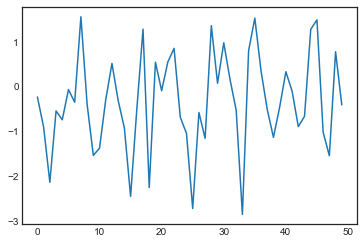

In [55]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

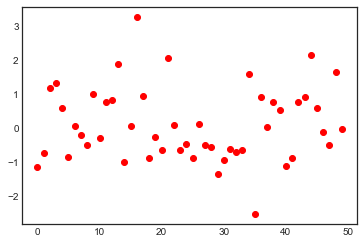

In [56]:
x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x,y,'ro')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

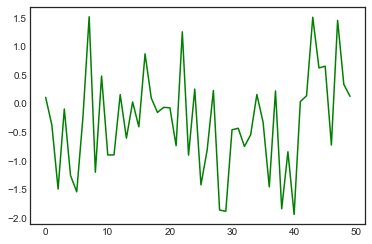

In [57]:
x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x,y,'g-')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

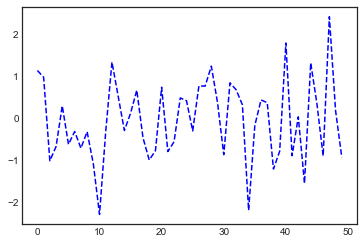

In [58]:
x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x,y,'b--')
plt.show

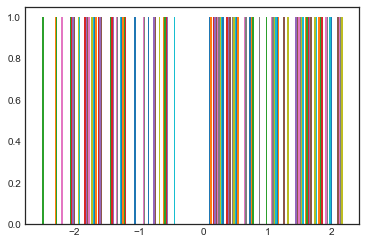

In [65]:
random_normal = tf.random.normal([100],0,1)
plt.hist(random_normal, bins=2)
plt.show()